In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df =pd.concat( pd.read_excel("C:/Users/Chinmay/Downloads/imus+(2).xlsx" , sheet_name = None),ignore_index=True)

In [37]:
df.head()

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,NaN,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,NaN,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,NaN,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,NaN,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,NaN,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17


In [38]:
df.shape

(2627926, 10)

In [39]:
df.dtypes

category                    int64
manufacturer               object
part_number                object
sku                        object
alt_sku                    object
description                object
status                     object
qty                         int64
price                     float64
sku_create_date    datetime64[ns]
dtype: object

In [213]:
df.duplicated(subset='part_number').sum()

573677

In [41]:
df.drop_duplicates(keep = False, inplace = True)

In [42]:
df.drop(['alt_sku'],axis=1,inplace=True)

In [43]:
df.head()

,category,manufacturer,part_number,sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17


In [214]:
df.describe()

,category,qty,price,day
count,907874.000000,907874.000000,9.078740e+05,907874.000000
mean,2079.972983,41.750570,4.236530e+03,21.072647
std,2459.964173,927.174219,1.394206e+05,3.686348
min,1.000000,0.000000,0.000000e+00,17.000000
25%,1221.000000,0.000000,3.504000e+01,17.000000
50%,1231.000000,0.000000,2.036900e+02,24.000000
75%,2210.000000,0.000000,1.097980e+03,24.000000
max,9999.000000,60063.000000,8.497453e+07,28.000000


In [140]:
df['part_number'].value_counts()

FEE SKU             87
E283219             21
88828-01            20
89434-01            20
65116-02            20
                    ..
CRD633ZZ-01511       1
BIGASSMOUNT60        1
CRD633ZZ-01851       1
C2W36CE-2CAF2M00     1
NK6APC14RD           1
Name: part_number, Length: 334197, dtype: int64

In [99]:
df1.shape

(113096, 10)

In [109]:
df['day']=pd.DatetimeIndex(df['sku_create_date']).day
df.head()

,category,manufacturer,part_number,sku,description,status,qty,price,sku_create_date,day
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17,17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17,17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17,17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17,17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17,17


In [110]:
df1=df.loc[df['status'] == "In Stock"]
#create a new column 
df1['sales'] = df1['price'] * df1['qty']

<ipython-input-110-d32e37d48e60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sales'] = df1['price'] * df1['qty']


In [215]:
df1.head()

,category,manufacturer,part_number,sku,description,status,qty,price,sku_create_date,day,sales
253,9920,CASE LOGIC-PERSONAL & PORTABLE,3200943,BA6371,"LAPTOP ROLLING CASE BLACK, SECURITY FRIENDLY 17IN",In Stock,7,99.00,2020-08-17,17,693.00
271,531,OMNITRON SYSTEMS,7206-0,BA6834,"1000BASE-SX SFP LC/MM/DF 850NM, 550M PLUGGABLE...",In Stock,2,59.09,2020-08-17,17,118.18
320,9070,ZEBRA ENTERPRISE MCD-A1,SAC5070-800CR,BC0227,"RS507 8SLOT BATTERY CHARGE KIT, EXT PWR SUPL/U...",In Stock,3,500.06,2020-08-17,17,1500.18
324,9080,ZEBRA ENTERPRISE MCD-A1,KT-CLMPT-RS507-01R,BC0232,"RS507 TRIGGER SWIVEL DOES NOT, INCLUDE STRAP/B...",In Stock,115,86.34,2020-08-17,17,9929.10
326,9080,ZEBRA ENTERPRISE MCD-A1,KT-PAD-RS507-10R,BC0234,"10 CT COMFORT PADS FOR RS507,",In Stock,42,51.80,2020-08-17,17,2175.60


In [216]:
df.shape

(907874, 10)

In [217]:
df2 =df1.groupby('manufacturer')['price'].sum()
df3 = df2.sort_values(ascending=False)
a=df3.head(5)
a

manufacturer
SONICWALL - HARDWARE      1292944.60
HPE - SWITCHING           1266722.25
MELLANOX TECHNOLOGIES      854188.02
LENOVO PREMIUM             778036.26
HP INC. - SB NOTEBOOKS     756680.24
Name: price, dtype: float64

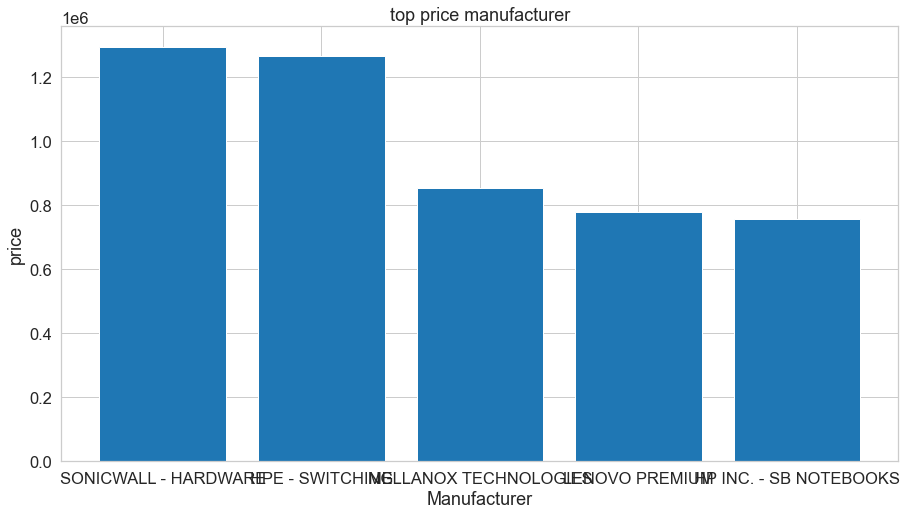

In [218]:
plt.figure(figsize=(15,8))
x=list(a.index)
y=list(a.values)
plt.xlabel('Manufacturer')
plt.ylabel('price')
plt.title('top price manufacturer')
plt.bar(x,y)
plt.show()

In [219]:
df2 =df1.groupby('manufacturer')['qty'].sum()
df4 = df2.sort_values(ascending=False)
b=df4.head(5)
b

manufacturer
DELL CSG SERVICE WARRANTIES      13578833
CONFIG 6                          3825896
DELL ESG WARRANTIES               3149689
STARTECH.COM                       939904
HP INC. - SB DESKTOP DISPLAYS      905072
Name: qty, dtype: int64

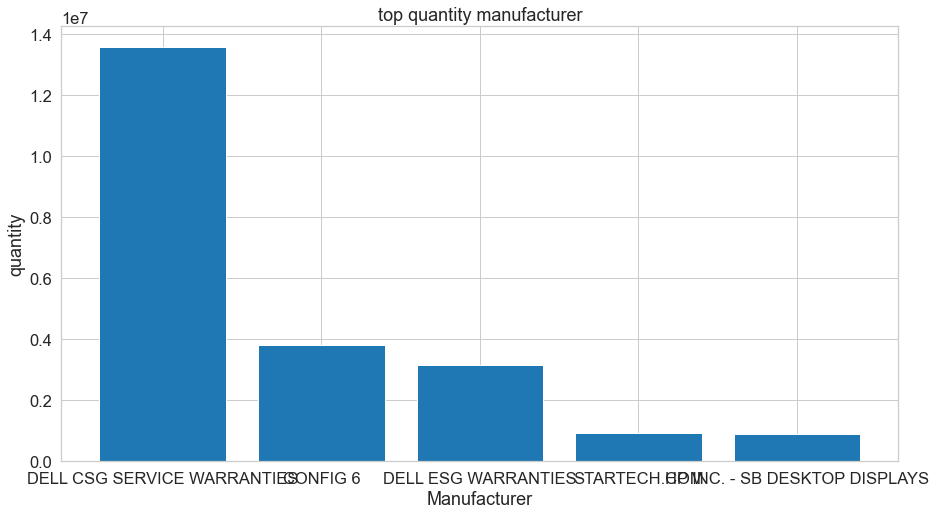

In [220]:
plt.figure(figsize=(15,8))
x=list(b.index)
y=list(b.values)
plt.xlabel('Manufacturer')
plt.ylabel('quantity')
plt.title('top quantity manufacturer')
plt.bar(x,y)
plt.show()

In [221]:
df2 =df1.groupby('manufacturer')['sales'].sum()
df5 = df2.sort_values(ascending=False)
c=df5.head(5)
c

manufacturer
DELL CSG SERVICE WARRANTIES      2.308292e+09
DELL ESG WARRANTIES              2.010732e+09
HP INC. - SB NOTEBOOKS           2.492580e+08
MICROSOFT- ESD                   1.588981e+08
HP INC. - SB DESKTOP DISPLAYS    1.475695e+08
Name: sales, dtype: float64

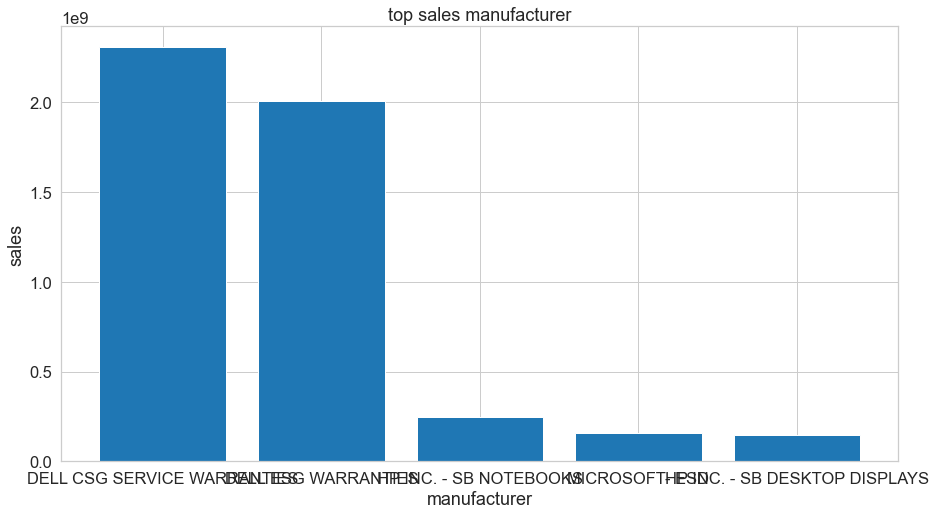

In [222]:
plt.figure(figsize=(15,8))
x=list(c.index)
y=list(c.values)
plt.xlabel('manufacturer')
plt.ylabel('sales')
plt.title('top sales manufacturer')
plt.bar(x,y)
plt.show()

### Top Manufacturers with Price , Quantity

In [223]:
#inner merge
df6 = pd.merge(df3,df4,on='manufacturer',how="inner")
e=df6.head(10)
e

,price,qty
manufacturer,,
SONICWALL - HARDWARE,1292944.60,30801
HPE - SWITCHING,1266722.25,46916
MELLANOX TECHNOLOGIES,854188.02,52165
LENOVO PREMIUM,778036.26,30208
HP INC. - SB NOTEBOOKS,756680.24,152039
AXIS COMMUNICATION INC,739877.77,71006
TRIPP LITE MASTER-POWER,722165.09,304114
LENOVO TOPSELLER THINKSTATION,665308.51,8600
APC SCHNEIDER ELECTRIC IT CONTAINER,619920.37,242984


In [224]:

#most profitable products according sales
ss=df1.groupby('day').sum()
ss.sort_values(['sales'],ascending=False)

,category,qty,price,sales
day,,,,
17,79504042,9671442,6469215.17,1.796269e+09
26,33502716,6810272,2923008.06,1.787039e+09
24,78333473,9567689,6258281.80,1.772176e+09
19,25127025,1728539,2180012.98,2.687843e+08
21,27383609,1782798,2319739.12,2.631063e+08
20,27441540,1740555,2342502.26,2.521369e+08
27,26709998,1760939,2234317.18,2.485110e+08
18,26378479,1572458,1957681.73,2.307562e+08
28,25938899,1700614,2121141.85,2.247782e+08


<AxesSubplot:xlabel='category'>

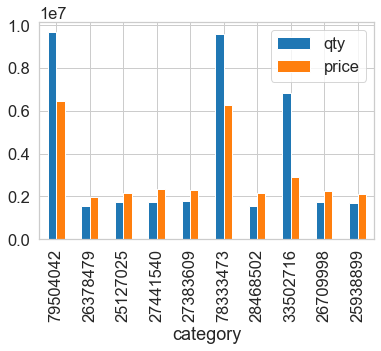

In [225]:
#top category by price and quantity
ss.plot(x="category", y=["qty", "price"], kind="bar")

<AxesSubplot:xlabel='manufacturer'>

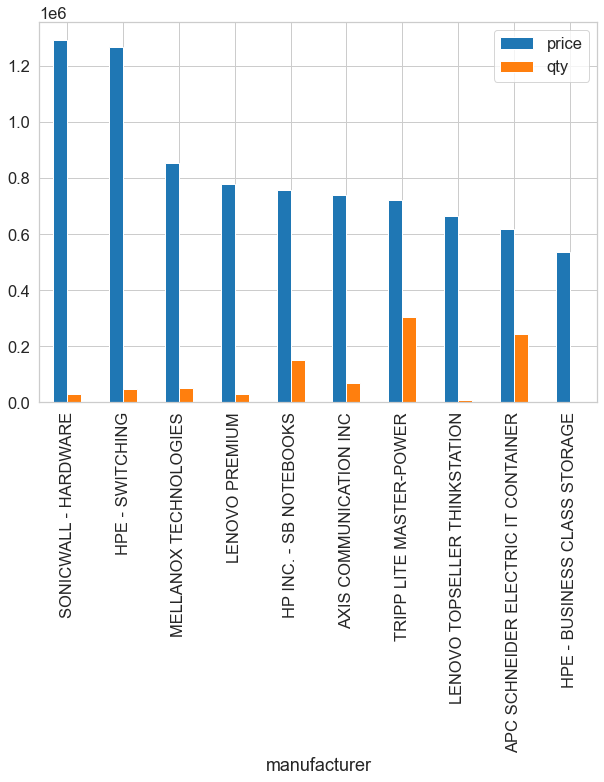

In [226]:
e.plot(kind='bar',figsize=(10,7))

In [227]:
Piv = df1.pivot_table(index=['part_number','price'],columns = ['day'],values='qty',aggfunc=np.sum)
Piv.head(10)

,day,17,18,19,20,21,24,25,26,27,28
part_number,price,,,,,,,,,,
0-00496,59.62,36.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN
0-00498,96.65,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003-000884-01-OE,398.68,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
00385,1.80,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
00388,2.48,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
00392,1.20,12.0,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN
00394,1.80,175.0,156.0,NaN,NaN,NaN,156.0,NaN,NaN,NaN,158.0
00397,2.48,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
00398,3.79,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [233]:
#nan to zero
Piv.fillna(0,inplace=True)

In [234]:
Piv.head()

,day,17,18,19,20,21,24,25,26,27,28
part_number,price,,,,,,,,,,
0-00496,59.62,36.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0
0-00498,96.65,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
003-000884-01-OE,398.68,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
00385,1.80,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
00388,2.48,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [237]:
#drop all rows where 2020-08-28 is zero
Piv.drop(Piv.loc[Piv[28]==0].index,inplace=True)
Piv.head()

,day,17,18,19,20,21,24,25,26,27,28
part_number,price,,,,,,,,,,
00394,1.80,175.0,156.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,158.0
00403,1.80,123.0,0.0,0.0,0.0,0.0,106.0,99.0,102.0,0.0,105.0
005365,13.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,650.0,0.0,649.0
005372,4.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,49.0,44.0
00691,5.65,22.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,18.0


In [238]:
Piv["Total_qty"] = Piv[17] - Piv[28]
#convert price index to a column
Piv.reset_index(inplace=True)
#drop NaN in Total_qty
Piv.dropna(subset=['Total_qty'],inplace=True)
Piv.head()

day,part_number,price,17,18,19,20,21,24,25,26,27,28,Total_qty
0,00394,1.80,175.0,156.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,158.0,17.0
1,00403,1.80,123.0,0.0,0.0,0.0,0.0,106.0,99.0,102.0,0.0,105.0,18.0
2,005365,13.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,650.0,0.0,649.0,-649.0
3,005372,4.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,49.0,44.0,-44.0
4,00691,5.65,22.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,18.0,4.0


In [158]:
#group by part_number and sum the qty and price
Piv1 = Piv.groupby('part_number')['Total_qty','price'].sum()

<ipython-input-158-54b0c829457e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Piv1 = Piv.groupby('part_number')['Total_qty','price'].sum()


In [159]:
Piv1["sales"] = Piv1['Total_qty'] * Piv1['price']

In [160]:
#sort by profit
Piv1 = Piv1.sort_values(by=['sales'],ascending=False)
Piv1.head()

sku_create_date,Total_qty,price,sales
part_number,,,
P00924-B21,2096.0,954.00,1999584.00
7KK07UT#ABA,775.0,1537.02,1191190.50
1FH49A8#ABA,4972.0,230.74,1147239.28
1FH47A8#ABA,6721.0,159.47,1071797.87
7KK32UT#ABA,508.0,1840.92,935187.36


### Most Profitable Products

In [239]:
#sort by profit
Piv1 = Piv1.sort_values(by=['sales'],ascending=False)
Piv1.head()

sku_create_date,Total_qty,price,sales
part_number,,,
P00924-B21,2096.0,954.00,1999584.00
7KK07UT#ABA,775.0,1537.02,1191190.50
1FH49A8#ABA,4972.0,230.74,1147239.28
1FH47A8#ABA,6721.0,159.47,1071797.87
7KK32UT#ABA,508.0,1840.92,935187.36


In [240]:
pivot = df1.pivot_table(index=['part_number'],columns = ['day'],values='price',aggfunc=np.sum)
pivot.head()

day,17,18,19,20,21,24,25,26,27,28
part_number,,,,,,,,,,
0-00496,59.62,NaN,NaN,NaN,NaN,59.62,NaN,NaN,NaN,NaN
0-00498,96.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003-000884-01-OE,398.68,NaN,NaN,NaN,NaN,398.68,NaN,NaN,NaN,NaN
00385,1.80,NaN,NaN,NaN,NaN,1.80,NaN,NaN,NaN,NaN
00388,2.48,NaN,NaN,NaN,NaN,2.48,NaN,NaN,NaN,NaN


In [241]:
pivot.groupby('part_number')
pivot.fillna(0,inplace=True)

In [242]:
pivot.head()

day,17,18,19,20,21,24,25,26,27,28
part_number,,,,,,,,,,
0-00496,59.62,0.0,0.0,0.0,0.0,59.62,0.0,0.0,0.0,0.0
0-00498,96.65,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
003-000884-01-OE,398.68,0.0,0.0,0.0,0.0,398.68,0.0,0.0,0.0,0.0
00385,1.80,0.0,0.0,0.0,0.0,1.80,0.0,0.0,0.0,0.0
00388,2.48,0.0,0.0,0.0,0.0,2.48,0.0,0.0,0.0,0.0


In [278]:
pivot["New"] = pivot[17] - pivot[18] - pivot[19] - pivot[20] - pivot[21] -  pivot[24] - pivot[25] - pivot[26] - pivot[27] - pivot[28]

### Products decreasing price

In [244]:
pivot3 = pivot["New"]
#drop 0 values
pivot3.drop(pivot3[pivot3 == 3].index,inplace=True)
pivot3.sort_values(ascending=False).head(5)

part_number
01-SSC-4084    10356.90
RX560-BK        9346.14
01914-001       9238.21
02-SSC-2629     8058.00
N7P36A          5507.88
Name: New, dtype: float64

### Products increasing price

In [66]:
pivot3.sort_values(ascending=True).head(5)

part_number
PSA7000-10G-SFP-PLUS   -117117.00
R3S72A                  -81787.98
JL376A#B2B              -69729.03
01-SSC-4097             -67047.30
C981Q                   -62214.21
Name: New, dtype: float64

### Top category by Price and Quintity

In [172]:
df2 =df1.groupby('category')['sales'].sum()
df5 = df2.sort_values(ascending=False)
df5.head(5)


category
1221    4.377736e+09
11      3.688671e+08
1251    2.674386e+08
303     2.504753e+08
1539    1.595262e+08
Name: sales, dtype: float64

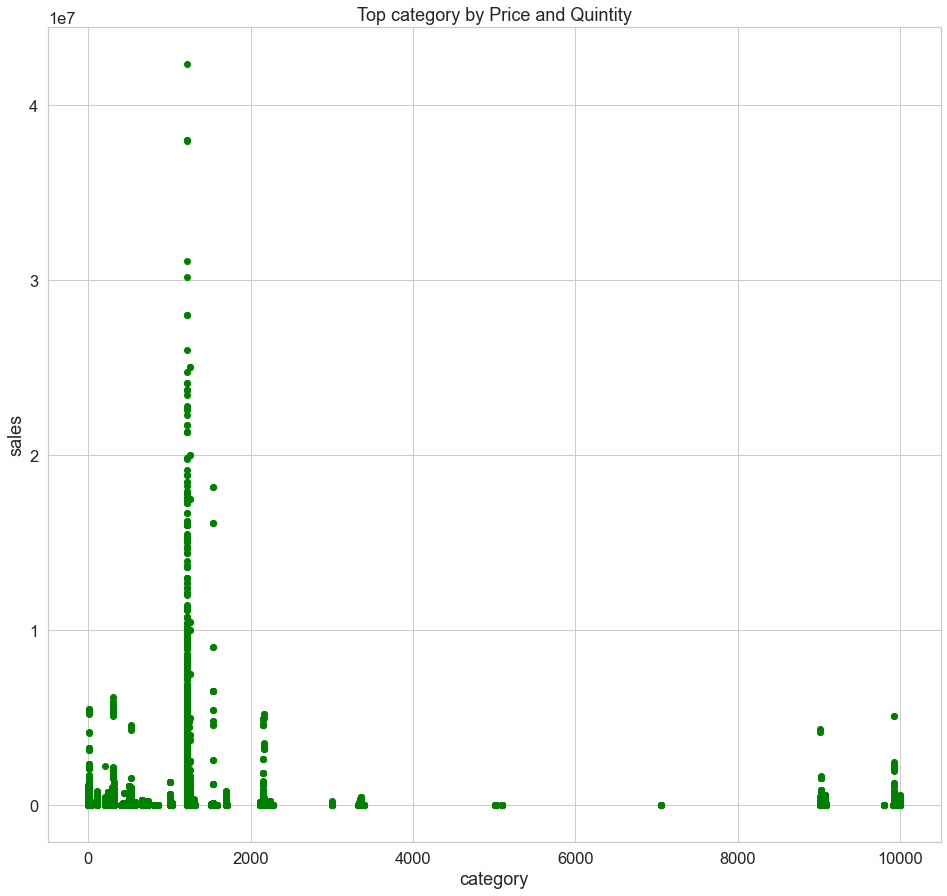

In [303]:
plt.figure(figsize=(16,15))
plt.scatter(df1['category'],df1['sales'],color='g')
plt.xlabel('category')
plt.ylabel('sales')
plt.title('Top category by Price and Quintity')
plt.show()

In [194]:
df1['day'].value_counts()

17    23456
24    23254
26    10381
20     8346
27     8244
21     8198
25     8184
19     7693
18     7673
28     7667
Name: day, dtype: int64

In [251]:
df7=df1.loc[df1['day'] == 17]
df8=df1.loc[df1['day'] == 28]

In [252]:
df9 = df7.groupby(['part_number'])['qty'].sum()
df9.sort_values( ascending=False).head(5)
df9

part_number
0-00496             36
0-00498             10
003-000884-01-OE     2
00385                1
00388                1
                    ..
ZT62062-T01A100Z     1
ZT62063-T010100Z    11
ZT62063-T01A100Z    10
ZT62063-T110100Z     6
ZUCUBJCK             2
Name: qty, Length: 22736, dtype: int64

In [253]:
df10 = df8.groupby(['part_number'])['qty'].sum()
df10.sort_values( ascending=False).head(5)

part_number
808-3108       60014
803-5495       59995
808-3177       59994
808-3105       59994
1FH47A8#ABA    31913
Name: qty, dtype: int64

In [255]:
#inner merge
df11 = pd.merge(df9,df10,how="inner",on='part_number')
df11.head()

,qty_x,qty_y
part_number,,
00394,175,158
00403,123,105
005365,811,649
005372,45,44
00691,22,18


In [257]:
#new column (qty_x - qty_y)**2
df11['sells'] = (df11['qty_x'] - df11['qty_y'])**2


### Products which are Aging

In [201]:
df12 = df11.groupby(['part_number'])['sells'].sum()
df12.sort_values( ascending=False).tail(5)


Series([], Name: sells, dtype: int64)

We can see that , the sells of these products are very less from 17th to 28th ,i.e, zero.That means from starting date the sells of these products are not happening due to certain reasons.So we can simply try to decrease price of these items to increase the sells and reduce these high stocks.

# For Nostock

In [258]:
dfn = df.loc[df['status'] == "No Stock"]
dfn.head()

,category,manufacturer,part_number,sku,description,status,qty,price,sku_create_date,day
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17,17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17,17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17,17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17,17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17,17


In [259]:
df13 =dfn.groupby('manufacturer')['price'].sum()
df14 = df13.sort_values(ascending=False)
df14.head(5)

manufacturer
CISCO - CCW MULTI YEAR           7.122279e+08
ALTNET                           3.154831e+08
CITRIX - NETSCALER               2.691865e+08
FORCEPOINT SOFTWARE              2.185683e+08
VERITAS BUYING PROGRAMS - NEW    2.177701e+08
Name: price, dtype: float64

In [263]:
df15 =dfn.groupby('manufacturer')['qty'].sum()
df16 = df15.sort_values(ascending=False)
df16.head()

manufacturer
22MILES                          0
PHOENIX AUDIO TECHNOLOGIES       0
PANASONIC PANABOARDS             0
PANASONIC FLAT PANEL DISPLAYS    0
PANASONIC CTO                    0
Name: qty, dtype: int64

### Top Manufacturers with Price , Quantity

In [262]:
#inner merge
Top = pd.merge(df14,df16,on='manufacturer')
Top.head()

,price,qty
manufacturer,,
CISCO - CCW MULTI YEAR,7.122279e+08,0
ALTNET,3.154831e+08,0
CITRIX - NETSCALER,2.691865e+08,0
FORCEPOINT SOFTWARE,2.185683e+08,0
VERITAS BUYING PROGRAMS - NEW,2.177701e+08,0


In [280]:
Pi = dfn.pivot_table(index=['part_number','price'],columns = ['day'],values='qty',aggfunc=np.sum)
Pi.head()

,day,17,18,19,20,21,24,25,26,27,28
part_number,price,,,,,,,,,,
+APCSMB,0.01,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
/E,631.33,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
/FC,0.01,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
/G,61.38,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
/HP,58.46,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [281]:
#nan to zero
Pi.fillna(0,inplace=True)

In [282]:
Pi.loc[Pi[28]==0]

,day,17,18,19,20,21,24,25,26,27,28
part_number,price,,,,,,,,,,
+APCSMB,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/E,631.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/FC,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/G,61.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
/HP,58.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
ZYWALLVPN,50.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYWALLVPN10,330.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZYWALLVPN5,197.73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
Pi["Total_qty"] = Pi[17] - Pi[28]

In [284]:
Pi.reset_index(inplace=True)
Pi.head()

day,part_number,price,17,18,19,20,21,24,25,26,27,28,Total_qty
0,+APCSMB,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/E,631.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/FC,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/G,61.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/HP,58.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [285]:
#group by part_number and sum the qty and price
Pi1 = Pi.groupby('part_number')['Total_qty','price'].sum()

<ipython-input-285-c7f95c0b851a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Pi1 = Pi.groupby('part_number')['Total_qty','price'].sum()


In [286]:
Pi1["sales"] = Pi1["Total_qty"] * Pi1["price"]

### Most Profitable Products

In [287]:
Pi1.sort_values(by=['sales'],ascending=False)
#drop sku_create_date
Pi1.drop(Pi1.columns[0],axis=1,inplace=True)
Pi1.head()

day,price,sales
part_number,,
+APCSMB,0.01,0.0
/E,631.33,0.0
/FC,0.01,0.0
/G,61.38,0.0
/HP,58.46,0.0


In [288]:
#groupby part_number
df17 = dfn.groupby('part_number')['price'].sum()
df17.sort_values( ascending=False).head(5)


part_number
ALT-TPM-240000000     1.699491e+08
ALT-TPM-80000000      5.664969e+07
SV5-SWA-JCE-1KGBPS    2.089800e+07
CON-3ECMU-LTCLX3UL    2.086371e+07
CON-3ECMU-LTCAEEX3    1.987020e+07
Name: price, dtype: float64

In [290]:
pivot1 = dfn.pivot_table(index=['part_number'],columns = ['day'],values='price',aggfunc=np.sum)

In [291]:
#sort the values in the pivot table
pivot1.sort_values(by = 17,ascending=False,inplace=True)

In [292]:
#groupby part_number of pivot1
df18 = pivot1.groupby('part_number')


In [293]:
#conver nan to 0
pivot1.fillna(0,inplace=True)

In [294]:
pivot1["New"] = pivot1[17] - pivot1[18] - pivot1[19] - pivot1[20] - pivot1[21] -  pivot1[24] - pivot1[25] - pivot1[26] - pivot1[27] - pivot1[28]
pivot1

day,17,18,19,20,21,24,25,26,27,28,New
part_number,,,,,,,,,,,
ALT-TPM-240000000,84974533.10,0.0,0.00,0.0,0.00,84974533.10,0.0,0.0,0.0,0.0,0.00
ALT-TPM-80000000,28324844.37,0.0,0.00,0.0,0.00,28324844.37,0.0,0.0,0.0,0.0,0.00
SV5-SWA-JCE-1KGBPS,10449000.00,0.0,0.00,0.0,0.00,10449000.00,0.0,0.0,0.0,0.0,0.00
CON-3ECMU-LTCLX3UL,8521380.00,0.0,0.00,0.0,0.00,8521380.00,3820950.0,0.0,0.0,0.0,-3820950.00
CON-3ECMU-LTCAEEX3,8115600.00,0.0,0.00,0.0,0.00,8115600.00,3639000.0,0.0,0.0,0.0,-3639000.00
...,...,...,...,...,...,...,...,...,...,...,...
ZT61046-T010200Z,0.00,0.0,3418.22,0.0,3418.22,0.00,0.0,0.0,0.0,0.0,-6836.44
ZVC300-C0-A00,0.00,0.0,0.00,0.0,1494.19,0.00,0.0,0.0,0.0,0.0,-1494.19
ZVC500-C0-A00,0.00,0.0,0.00,0.0,1814.37,0.00,0.0,0.0,0.0,0.0,-1814.37


### Products in decreasing price

In [295]:
pivot2 = pivot1["New"]
#drop 0 values
pivot2.drop(pivot2[pivot2 == 0].index,inplace=True)
pivot2.sort_values(ascending=False).head(5)

part_number
SUP-SX6536-5G     284411.21
SUP-SX6536-5GP    199087.43
SUP-SX6518-5G     147276.30
SUP-SX6536-5S     142205.60
SUP-SX6536-5SP    104284.39
Name: New, dtype: float64

### Products  in increasing price

In [296]:
pivot2.sort_values(ascending=True).head(5)

part_number
CON-3ECMU-LTCLX3UL   -3820950.00
CON-3ECMU-LTCAEEX3   -3639000.00
CON-3ECMU-LPHOME6S   -3119143.38
CON-3ECMU-OFUL6OBL   -1910475.00
CON-3ECMU-LTCACLM3   -1910475.00
Name: New, dtype: float64

### Top Category by Price And Quantity

In [297]:
dfn5 = dfn.groupby('category')['price'].sum()
dfn5.sort_values(ascending=False).head(1)

category
1221    1.190726e+09
Name: price, dtype: float64

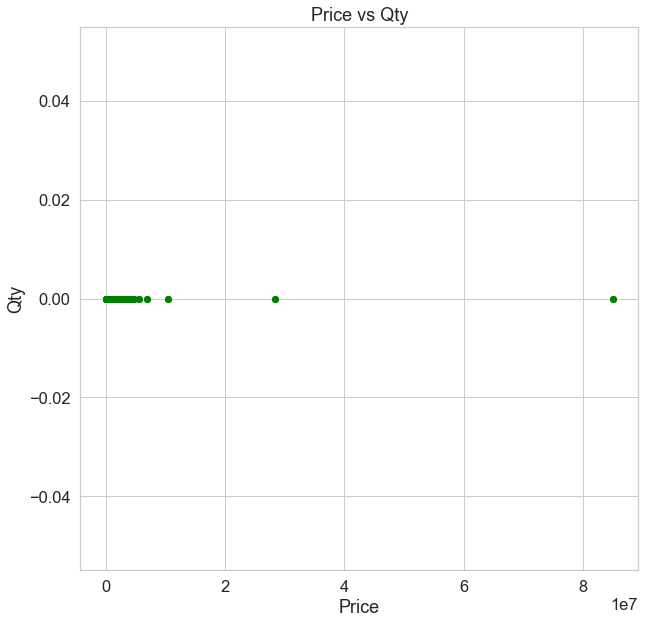

In [299]:

plt.figure(figsize=(10,10))
plt.scatter(dfn['price'],dfn['qty'],color='g')
plt.xlabel('Price')
plt.ylabel('Qty')
plt.title('Price vs Qty')
plt.show()